# [Exercise 07-1] Improvements
- IMDB Sentiment Analysis문제의 Accuracy를 더 끌어 올릴 방법은 없는지 시도해보고 예제의 결과와 비교하라.


> convolution함수 정의 안에 kernel_initializer='he_normal' 를 추가해서 예제보다 0.01 더 올릴수 있었습니다.  
Test accuracy:  0.8871999979019165

> 07-3-CNN-IMDB-3 실행결과  
Test accuracy:  0.8715599775314331

> BatchNormalization을 추가해보았으나 결과가 모두 0.5대로 동일하게 매번의 epoch실행마다 나오는것을 확인할수 있었습니다.

> FC Layer에도 Kernel_initializer='he_normal'를 추가해보았지만 큰차이는 없었습니다.

In [0]:
%tensorflow_version 2.x

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv1D, MaxPooling2D, Embedding, Flatten
from tensorflow.keras.layers import Reshape, Conv2D, GlobalMaxPooling2D
from tensorflow.keras import optimizers

In [0]:
num_features = 3000
sequence_length = 300
embedding_dimension = 100
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_features)
X_train = pad_sequences(X_train, maxlen = sequence_length)
X_test = pad_sequences(X_test, maxlen = sequence_length)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate, Input

In [0]:
filter_sizes = [3, 4, 5]

In [0]:
def convolution():
    inn = Input(shape = (sequence_length, embedding_dimension, 1))
    convolutions = []
    # we conduct three convolutions & poolings then concatenate them.
    for fs in filter_sizes:
        conv = Conv2D(filters = 100, kernel_size = (fs, embedding_dimension), strides = 1, padding = "valid", kernel_initializer='he_normal')(inn)
        # model.add(BatchNormalization())
        nonlinearity = Activation('relu')(conv)
        maxpool = MaxPooling2D(pool_size = (sequence_length - fs + 1, 1), padding = "valid")(nonlinearity)
        convolutions.append(maxpool)
        
    outt = concatenate(convolutions)
    model = Model(inputs = inn, outputs = outt)
        
    return model

In [0]:
def imdb_cnn_3():
    
    model = Sequential()
    model.add(Embedding(input_dim = 3000, output_dim = embedding_dimension, input_length = sequence_length))
    model.add(Reshape((sequence_length, embedding_dimension, 1), input_shape = (sequence_length, embedding_dimension)))
    
    # call convolution method defined above
    model.add(convolution())
    
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(10))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    adam = optimizers.Adam(lr = 0.001)

    model.compile(loss='binary_crossentropy', optimizer=adam , metrics=['accuracy'])
    
    return model

In [0]:
model = imdb_cnn_3()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          300000    
_________________________________________________________________
reshape (Reshape)            (None, 300, 100, 1)       0         
_________________________________________________________________
model (Model)                (None, 1, 1, 300)         120300    
_________________________________________________________________
flatten (Flatten)            (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                3010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
_________________________________________________________________
dropout (Dropout)            (None, 10)                0

In [0]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, epochs = 10, validation_split = 0.2, verbose = 1)

Epoch 1/10
400/400 [==============================] - 9s 22ms/step - loss: 0.5537 - accuracy: 0.7032 - val_loss: 0.3467 - val_accuracy: 0.8622
Epoch 2/10
400/400 [==============================] - 9s 21ms/step - loss: 0.3329 - accuracy: 0.8745 - val_loss: 0.2740 - val_accuracy: 0.8900
Epoch 3/10
400/400 [==============================] - 9s 21ms/step - loss: 0.2554 - accuracy: 0.9143 - val_loss: 0.2747 - val_accuracy: 0.8866
Epoch 4/10
400/400 [==============================] - 9s 21ms/step - loss: 0.1824 - accuracy: 0.9447 - val_loss: 0.3010 - val_accuracy: 0.8878
Epoch 5/10
400/400 [==============================] - 9s 21ms/step - loss: 0.1312 - accuracy: 0.9614 - val_loss: 0.3436 - val_accuracy: 0.8930
Epoch 6/10
400/400 [==============================] - 9s 21ms/step - loss: 0.0931 - accuracy: 0.9730 - val_loss: 0.4087 - val_accuracy: 0.8846
Epoch 7/10
400/400 [==============================] - 9s 21ms/step - loss: 0.0876 - accuracy: 0.9742 - val_loss: 0.4479 - val_accuracy: 0.8848

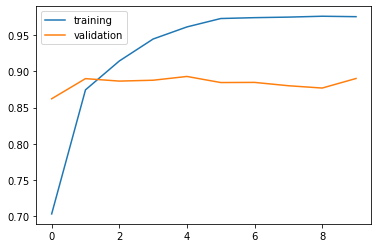

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [0]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

782/782 [==============================] - 4s 5ms/step - loss: 0.5438 - accuracy: 0.8872
Test accuracy:  0.8871999979019165
